In [1]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import numpy as np
%matplotlib inline

In [2]:
client = Client("IRIS")

In [3]:

t1 = UTCDateTime("2019-01-07T00:00:00")
t2 = UTCDateTime("2020-01-07T00:00:00")
event_list = client.get_events(starttime=t1, endtime=t2, minmagnitude=6)

In [4]:
event_list

141 Event(s) in Catalog:
2019-12-25T20:20:12.751000Z | -25.223, -115.844 | 6.1 Mww
2019-12-25T03:36:01.578000Z | +50.608, -129.966 | 6.3 mww
...
2019-01-15T18:06:34.290000Z | -13.331, +166.879 | 6.6 mww
2019-01-08T12:39:31.040000Z | +30.593, +131.037 | 6.3 Mww
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [6]:
inventory = client.get_stations(network="IU", station="*",starttime=t1,endtime=t2)

In [7]:
inventory

Inventory created at 2020-08-04T04:07:28.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.45
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2019-01-07...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			IU
		Stations (81):
			IU.ADK (Adak, Aleutian Islands, Alaska)
			IU.AFI (Afiamalu, Samoa)
			IU.ANMO (Albuquerque, New Mexico, USA)
			IU.ANTO (Ankara, Turkey)
			IU.BBSR (Bermuda Institute of Ocean Sciences, St George's Bermuda)
			IU.BILL (Bilibino, Russia)
			IU.CASY (Casey, Antarctica)
			IU.CCM (Cathedral Cave, Missouri, USA)
			IU.CHTO (Chiang Mai, Thailand)
			IU.COLA (College Outpost, Alaska, USA)
			IU.COR (Corvallis, Oregon, USA)
			IU.CTAO (Charters Towers, Australia) (2x)
			IU.DAV (Davao, Philippines)
			IU.DWPF (Disney Wilderness Preserve, Florida, USA)
			IU.FUNA (Funafuti, Tuvalu)
			IU.FURI (Mt. Furi, Ethiopia)
			IU.GNI (Garni, Armenia)
			IU.GRFO (Grafenberg, Germany)
			IU.GUMO (Guam, Mariana Islands)
			IU.

In [8]:
#client = Client("http://127.0.0.1:1001")

In [9]:
#event_list=client.get_events()

In [10]:
event_list[1].origins[0].time

2019-12-25T03:36:01.578000Z

In [11]:
event1=event_list[1]

In [12]:
ori1=event1.origins[0]

In [13]:
ori1.time

2019-12-25T03:36:01.578000Z

In [14]:
st1 = client.get_waveforms("IU","*","*","*",ori1.time,ori1.time+120)

In [16]:
dt = st1[0].stats.starttime

In [17]:
st1[0].stats.endtime

2019-12-25T03:38:01.569538Z

In [18]:
fname=i.get_id()+".png"
st1[0].slice(dt,dt+5).plot(outfile=fname,format="png")

In [19]:
dt = st1[0].stats.starttime
ed = dt
cc=0
while True:
    ed = ed + 5
    fname=i.get_id()+"_"+str(cc)+".png"
    
    if ed > st1[0].stats.endtime:
        break
        
    st1[0].slice(dt+cc*5,ed).plot(outfile=fname,format="png")
    cc = cc+1

In [20]:
from PIL import Image

In [22]:
im = Image.open('IU.OTAV.10.BH2_0.png')

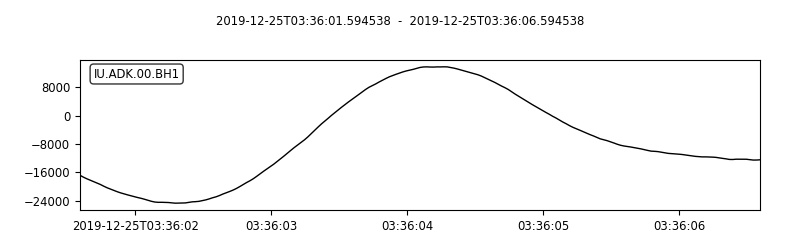

In [28]:
im

In [23]:
im.size

(800, 250)

In [24]:
im.format

'PNG'

In [25]:
im.mode

'RGBA'

In [26]:
aa=np.array(im.getdata())

In [27]:
aa.shape

(200000, 4)